In [65]:
# import and difinitions
import math
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from functools import partial
from collections import namedtuple


In [97]:

# how many samples
N = 200


Sample = namedtuple('Sample', ['x', 'y', 'z', 'theta', 'phi', 'coeffs'])
#generate uniform samples
def getSamples(N):
    s = []
    n = float(N)
    for i in range(N):
        for j in range(N):
            theta = 2.0 * math.acos(math.sqrt(1.0-(i+random.random())/n))
            phi = (j+random.random())/n*math.pi*2
            x = math.cos(phi)*math.sin(theta)
            y = math.sin(phi)*math.sin(theta)
            z = math.cos(theta)
            coeffs = []
            for l in range(0, 4):
                for m in range(-l, l+1):
                    coeffs.append(SH(l, m, theta, phi))
            s.append(Sample(x, y, z, theta, phi, coeffs))
    return s

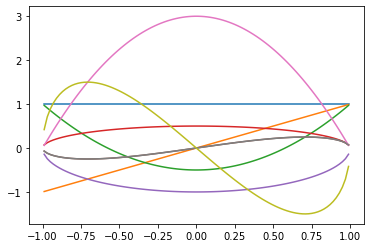

In [66]:
facttable = [math.factorial(x) for x in range(0, 40)]
# for fast factorial calculation


def factorial(x):
    return facttable[x]

# The Legendre polynomials


def P(l, m, x):
    # evaluate an Associated Legendre Polynomial P(l,m,x) at x
    fact2 = 1
    if m < 0:
        fact2 = 1.0/(pow(-1,m)*math.factorial(l-m)/math.factorial(l+m))
    m=abs(m)
    #  evaluate an Associated Legendre Polynomial P(l,m,x) at x
    pmm = 1.0
    
    somx2 = math.sqrt((1.0 - x) * (1.0 + x))
    fact = 1.0
    for i in range(1, m+1):  # (int i=1; i <= m; i++):
        pmm *= (-fact) * somx2
        fact += 2.0
    
    if (l == m):
        return pmm*fact2
    pmmp1 = x * (2.0 * m + 1.0) * pmm
    if (l == m + 1):
        return pmmp1*fact2
    pll = 0.0
    for ll in range(m+2, l+1):  # (int ll=m + 2; ll <= l; ++ll):

        pll = ((2.0 * ll - 1.0) * x * pmmp1 - (ll + m - 1.0) * pmm) / (ll - m)
        pmm = pmmp1
        pmmp1 = pll

    return pll*fact2


XAxis = [((x+0.5)/100.0-0.5)*2 for x in range(0, 100)]

plt.plot(XAxis, [P(0, 0, XAxis[x]) for x in range(0, 100)])
plt.plot(XAxis, [P(1, 0, XAxis[x]) for x in range(0, 100)])
plt.plot(XAxis, [P(2, 0, XAxis[x]) for x in range(0, 100)])
plt.plot(XAxis, [P(1, -1, XAxis[x]) for x in range(0, 100)])
plt.plot(XAxis, [P(1, 1, XAxis[x]) for x in range(0, 100)])
plt.plot(XAxis, [P(2, -1, XAxis[x]) for x in range(0, 100)])
plt.plot(XAxis, [P(2, 2, XAxis[x]) for x in range(0, 100)])
plt.plot(XAxis, [P(2, -1, XAxis[x]) for x in range(0, 100)])
plt.plot(XAxis, [P(2, 1, XAxis[x]) for x in range(0, 100)])


the integral = 0.0000
the integral = 0.0000
the integral = -0.2857
the integral = -3.5343


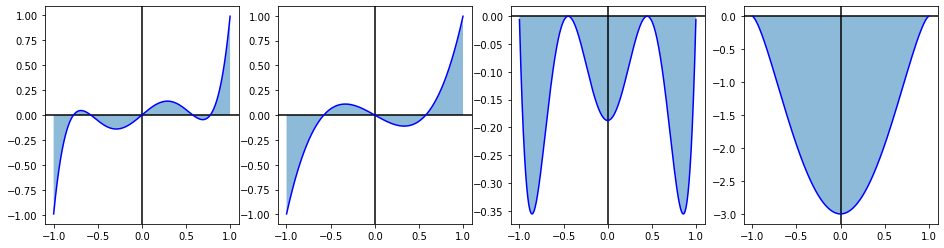

In [96]:
#verity orthogonality of P 
def integrateP( l1,m1, l2,m2,fig,row, col,index):
    v1=[]
    v2=[]
    product=[]
    XAxis=[]
    sum = 0
    N= 1000.0
    for i in range(int(N)):
        x = ((i+0.5)/N-0.5)*2 #map [0,N) to (-1..1)
        XAxis.append(x)
        a = P(l1,m1,x)
        b = P(l2,m2,x)
        v1.append(a )
        v2.append(b )
        product.append(a*b)
        sum += (a*b)/N*2
    fig.add_subplot(row,col,index)
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    # plt.plot(XAxis,v1,c="red")
    # plt.plot(XAxis,v2,c="green")
    plt.fill_between(XAxis, product,  alpha=0.5)
    plt.plot(XAxis,product,c="blue")
    print ("the integral = %.4f"%sum)
fig = plt.figure(figsize=[16,4])    
integrateP(3,0,2,0,fig,1,4,1) # should be zero
integrateP(1,0,2,0,fig,1,4,2) # should be zero
integrateP(3,-1,3,1,fig,1,4,3) # should be constant
integrateP(1,1,2,2,fig,1,4,4) # should be constant

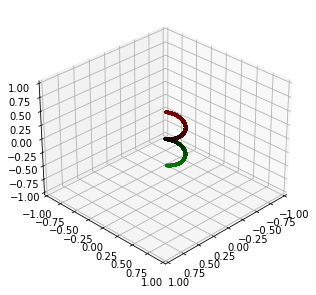

In [74]:
# renormalisation constant for SH function
def K(l, m):
    temp = ((2.0*l+1.0)*factorial(l-m)) / (4.0*math.pi*factorial(l+m))
    return math.sqrt(temp)
# spherical harmonic funcion


def SH(l, m, theta, phi):
    sqrt2 = math.sqrt(2.0)
    if m == 0:
        return K(l, 0)*P(l, m, math.cos(theta))
    elif m > 0:
        return sqrt2*K(l, m)*math.cos(m*phi)*P(l, m, math.cos(theta))
    else:
        return sqrt2*K(l, -m)*math.sin(-m*phi)*P(l, -m, math.cos(theta))


def visMyFunc(func, fig, a=1, b=1, c=1, fixedTheta=-1000 , fixedPhi=-1000):
    ax = fig.add_subplot(a, b, c, projection='3d')
    x = []
    y = []
    z = []
    c = []
    samples = getSamples(N)
    for s in samples:
        theta = s.theta
        
        phi = s.phi
        if fixedPhi > -1000:
            phi = fixedPhi
        if fixedTheta > -1000:
            theta = fixedTheta            
        xx = math.cos(phi)*math.sin(theta)
        yy = math.sin(phi)*math.sin(theta)
        zz = math.cos(theta)
        v = func(theta, phi)

        x.append(xx*abs(v))
        y.append(yy*abs(v))
        z.append(zz*abs(v))
        if v > 0:
            c.append([v, 0, 0])
        else:
            c.append([0, -v, 0])

    ax.scatter(x, y, z, s=5, c=c)
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])

    ax.view_init(30, 45)


fig = plt.figure(figsize=[5, 5])
visMyFunc(partial(SH, 1, 0), fig,fixedPhi= 2.14)


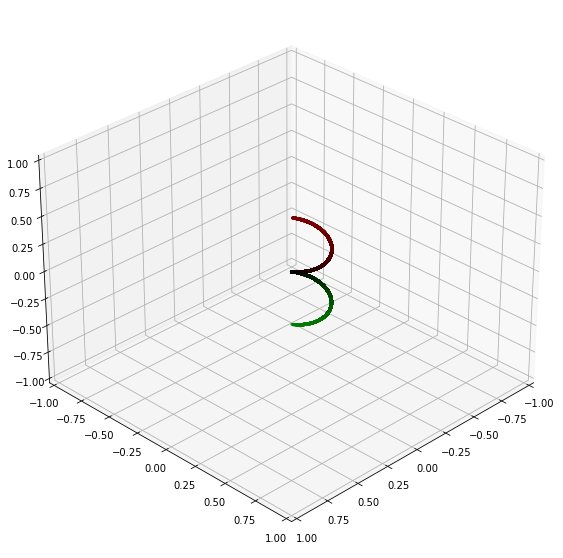

In [69]:
# renormalisation constant for SH function
def K(l, m):
    temp = ((2.0*l+1.0)*factorial(l-m)) / (4.0*math.pi*factorial(l+m))
    return math.sqrt(temp)
# spherical harmonic funcion


def SH(l, m, theta, phi):
    sqrt2 = math.sqrt(2.0)
    if m == 0:
        return K(l, 0)*P(l, m, math.cos(theta))
    elif m > 0:
        return sqrt2*K(l, m)*math.cos(m*phi)*P(l, m, math.cos(theta))
    else:
        return sqrt2*K(l, -m)*math.sin(-m*phi)*P(l, -m, math.cos(theta))


def visMyFunc(func, fig, a=1, b=1, c=1, fixedTheta=-1000 , fixedPhi=-1000):
    ax = fig.add_subplot(a, b, c, projection='3d')
    x = []
    y = []
    z = []
    c = []
    samples = getSamples(N)
    for s in samples:
        theta = s.theta
        
        phi = s.phi
        if fixedPhi > -1000:
            phi = fixedPhi
        if fixedTheta > -1000:
            theta = fixedTheta            
        xx = math.cos(phi)*math.sin(theta)
        yy = math.sin(phi)*math.sin(theta)
        zz = math.cos(theta)
        v = func(theta, phi)

        x.append(xx*abs(v))
        y.append(yy*abs(v))
        z.append(zz*abs(v))
        if v > 0:
            c.append([v, 0, 0])
        else:
            c.append([0, -v, 0])

    ax.scatter(x, y, z, s=5, c=c)
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])

    ax.view_init(30, 45)


fig = plt.figure(figsize=[10, 10])
visMyFunc(partial(SH, 1, 0), fig,fixedPhi= 2.14)


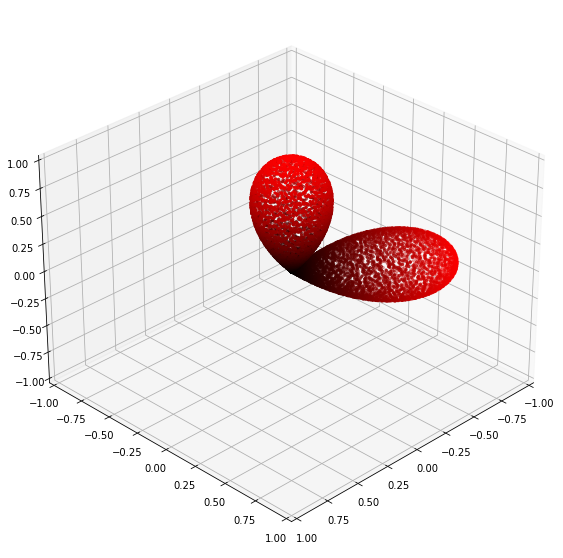

In [70]:
def myFunc(theta, phi):
    return max(0, 5*math.cos(theta)-4) + max(0, -4*math.sin(theta-math.pi)*math.cos(phi-2.5)-3)
# visualize myFunc


fig = plt.figure(figsize=[10, 10])
visMyFunc(myFunc, fig)


In [71]:
# projection

result = []

result = [0]*16
samples = getSamples(N)
weight = 4*math.pi
oneOverN = 1/(N*N)
factor = weight*oneOverN

for s in samples:
    f = myFunc(s.theta, s.phi)
    for i in range(16):
        result[i] += s.coeffs[i]*f*factor

print(r"the results are almost same as calculated in page 17, http://www.cse.chalmers.se/~uffe/xjobb/Readings/GlobalIllumination/Spherical%20Harmonic%20Lighting%20-%20the%20gritty%20details.pdf")
print(["%.6f" % elem for elem in result])


the results are almost same as calculated in page 17, http://www.cse.chalmers.se/~uffe/xjobb/Readings/GlobalIllumination/Spherical%20Harmonic%20Lighting%20-%20the%20gritty%20details.pdf
['0.398898', '-0.210601', '0.286595', '0.281968', '-0.315032', '-0.000138', '0.131403', '0.000147', '0.093220', '-0.249641', '-0.000024', '0.123068', '0.303933', '-0.164976', '-0.000034', '-0.092238']


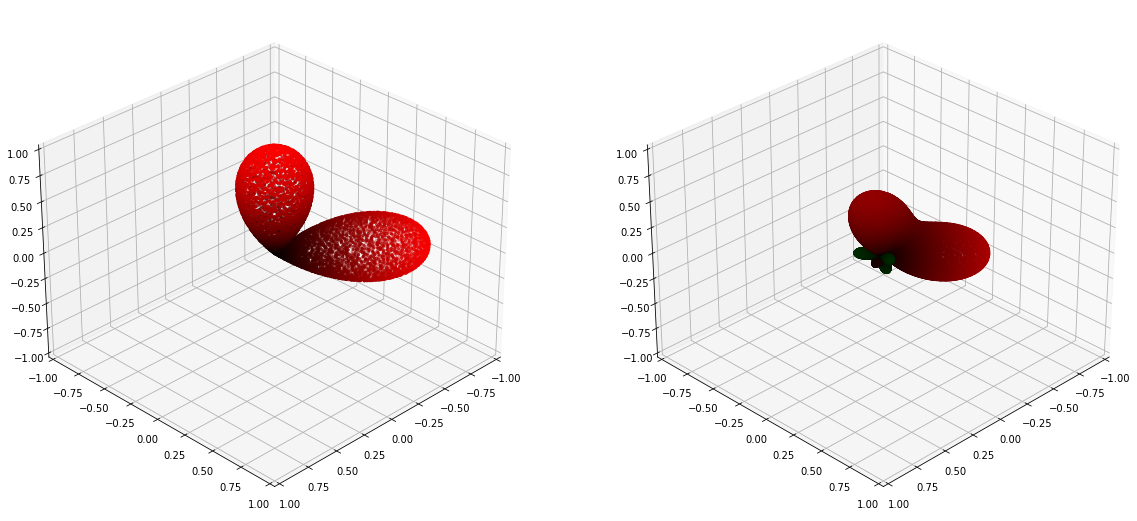

In [72]:


# rebuild
def rebuild_myFunc(coeffs, theta, phi):
    result = 0
    i = 0
    for l in range(0, 4):
        for m in range(-l, l+1):
            result += SH(l, m, theta, phi)*coeffs[i]
            i += 1
    return result


g = partial(rebuild_myFunc, result)
# show original function and compare with rebuilt from coeffs
fig = plt.figure(figsize=[20, 20])

visMyFunc(myFunc, fig, 1, 2, 1)
visMyFunc(g, fig, 1, 2, 2)
